In [1]:
# Importing all the Libraries we need for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the provided csv file (covid19.csv) into your Colab environment as a Pandas DataFrame.

In [2]:
# Reading the CSV file using pandas

covidData = pd.read_csv('covid19.csv')

Show the top 5 rows of the dataframe.

In [3]:
# Showing the first five rows of the covidData using df.head()

covidData.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328


Show the summary statistic of the data.


In [4]:
# Showing the summary statistic of the covidData using df.describe()

covidData.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3265.000000,3897.000000,3897.000000,3.984000e+03,3984.000000,3.984000e+03,3.983000e+03,3895.000000,3940.000000
mean,32386.688208,35.973564,-72.005376,2.110788e+04,474.467620,1.187575e+04,8.748282e+03,5770.649567,1.939365
std,18017.294540,13.043953,53.751137,1.057523e+05,2729.271632,8.221851e+04,6.180559e+04,3208.655754,5.493363
min,66.000000,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-1.083768e+06,0.000000,0.000000
25%,19049.000000,33.268798,-96.616867,7.000000e+02,9.000000,0.000000e+00,5.910000e+02,3599.272506,0.969272
50%,30067.000000,37.946365,-86.854759,1.964000e+03,32.000000,0.000000e+00,1.663000e+03,5851.131858,1.540464
75%,47039.000000,42.220792,-77.492245,7.721750e+03,114.000000,0.000000e+00,4.926000e+03,7762.999138,2.310092
max,99999.000000,71.706900,178.065000,2.636045e+06,64731.000000,2.114760e+06,2.400750e+06,27388.219766,271.875000


Show the info of the data.

In [5]:
# Showing the info of the covidData using df.info()

covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3811 non-null   object 
 3   Country_Region       3984 non-null   object 
 4   Last_Update          3984 non-null   object 
 5   Lat                  3897 non-null   float64
 6   Long_                3897 non-null   float64
 7   Confirmed            3984 non-null   int64  
 8   Deaths               3984 non-null   int64  
 9   Recovered            3984 non-null   int64  
 10  Active               3983 non-null   float64
 11  Combined_Key         3984 non-null   object 
 12  Incident_Rate        3895 non-null   float64
 13  Case_Fatality_Ratio  3940 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.9+ KB


Show the number of null values in each columns.

In [6]:
# Showing the number of null values in each columns using isnull() and .sum()

covidData.isnull().sum()

FIPS                   719
Admin2                 714
Province_State         173
Country_Region           0
Last_Update              0
Lat                     87
Long_                   87
Confirmed                0
Deaths                   0
Recovered                0
Active                   1
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     44
dtype: int64

We see that there is one null value on ‘Active’ column. Show the row that contains the null value in the ‘Active’ column.

In [7]:
# Showing the row that contains null value in 'Active' column using fancy indexing and isnull()

covidData[covidData['Active'].isnull()]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
78,NaN,NaN,Diamond Princess,Canada,2020-12-21 13:27:30,NaN,NaN,0,1,0,NaN,"Diamond Princess, Canada",NaN,NaN


Fill the null value on the ‘Active’ column with zero. And then verify that the null value on ‘Active’ has been filled with a zero.

In [8]:
# Filling the null value on the 'Active' column with 0, using fillna and inplace

covidData['Active'].fillna(0, inplace = True)

In [9]:
# Verifying the null value is filled

covidData['Active'].isnull().any()

False

In [10]:
# verifying the null value is filled with 0

covidData[(covidData['Province_State'] == 'Diamond Princess') & (covidData['Country_Region'] == 'Canada')] # We see that 'Active' column's null value is filled 0

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
78,NaN,NaN,Diamond Princess,Canada,2020-12-21 13:27:30,NaN,NaN,0,1,0,0.0,"Diamond Princess, Canada",NaN,NaN


Using Seaborn and Matplotlib, plot the histograms of logarithm of ‘Confirmed’, ‘Deaths’, and ‘Recovered’ columns. 

In [11]:
confirmed = covidData[covidData['Confirmed'] != 0]['Confirmed'] # excluding data with zero value in column Confirmed
deaths = covidData[covidData['Deaths'] != 0]['Deaths']          # excluding data with zero value in column Deaths
recovered = covidData[covidData['Recovered'] != 0]['Recovered'] # excluding data with zero value in column Recovered

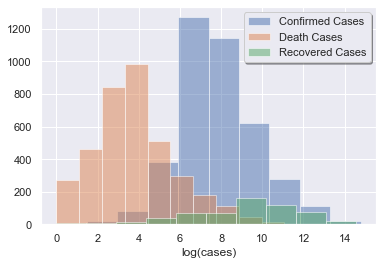

In [12]:
# Histogram for the logarithms of three columns

sns.set()                                                           # for grid in the figure

plt.xlabel('log(cases)')                                            # label for X-Axis

plt.hist(np.log(confirmed), label = 'Confirmed Cases', alpha = 0.5) # histogram for Confirmed column

plt.hist(np.log(deaths), label = 'Death Cases', alpha = 0.5)        # histogram for Deaths column

plt.hist(np.log(recovered), label = 'Recovered Cases', alpha = 0.5); # histogram for Recovered column

plt.legend(fancybox=True, shadow=True);                              # showing the legend in the figure

Plot the KDE plot of the logarithms of the columns ‘Confirmed’, ‘Deaths’, and ‘Recovered’ columns.

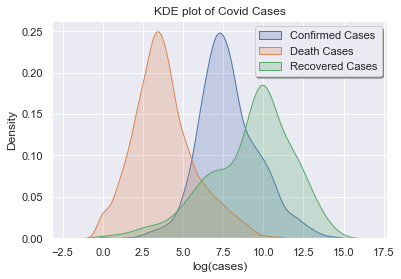

In [13]:
# KDE plot for logarithms of three columns

plt.title('KDE plot of Covid Cases')                                      # title for the figure
 
plt.xlabel('log(cases)')                                                  # label for X-Axis

sns.kdeplot(np.log(confirmed), shade = True, label = 'Confirmed Cases')   # KDE for Confirmed column

sns.kdeplot(np.log(deaths), shade = True, label = 'Death Cases')          # KDE for Death column

sns.kdeplot(np.log(recovered), shade = True, label = 'Recovered Cases')   # KDE for Recovered column

plt.legend(fancybox = True, shadow = True);                               # adding legend to the KDE

KDE plots above represents the distribution of confirmed cases, death cases and recovered cases. The avergae scale for death cases is 2.5, which has been repeated multiple times but, but the number is lower. That means number of people dieing is less. Whereas, the avergae scale for confirmed cases is 7.5 and this has also repeated multiple times, that means number of cases are higher, finally the average scale for recovered cases is 10.0 and it has also repeated multiple times, that means as much people are getting positive, people are also recovering.

Show the top 10 countries ranked by Confirmed cases exactly as shown below.

In [14]:
# Finding the top 10 countries having maximum number of cases using groupby() and sort_values()

top10byCC = covidData.groupby('Country_Region').sum()[['Confirmed','Deaths','Recovered']].sort_values('Confirmed', ascending = False).reset_index(level=0)

top10byCC[:10] # showing the first 10 rows

,Country_Region,Confirmed,Deaths,Recovered
0,US,20254160,354366,0
1,India,10286709,148994,9883461
2,Brazil,7700578,195411,6855372
3,Russia,3153960,56798,2553467
4,France,2697014,64892,200822
5,United Kingdom,2549693,74237,5682
6,Turkey,2220855,21093,2114760
7,Italy,2129376,74621,1479988
8,Spain,1928265,50837,150376
9,Germany,1762637,34145,1388744


Remove the rows with ‘Confirmed’ and ‘Deaths’ equal to zero from the above ranked DataFrame in step 10.

In [15]:
# Removing the rows having Confirmed and Deaths 0 fancy indexing

droppedZeros = top10byCC[(top10byCC['Confirmed'] != 0) & (top10byCC['Deaths'] != 0)]
droppedZeros

,Country_Region,Confirmed,Deaths,Recovered
0,US,20254160,354366,0
1,India,10286709,148994,9883461
2,Brazil,7700578,195411,6855372
3,Russia,3153960,56798,2553467
4,France,2697014,64892,200822
...,...,...,...,...
174,Saint Lucia,353,5,289
176,Antigua and Barbuda,159,5,148
177,Brunei,157,3,149
181,Fiji,49,2,44


 Show the 5 countries with the least non-zero Confirmed cases as shown below.

In [16]:
# Sorting the removed dataframe in descending order and showing the countries having least non-Zero confirmed cases

droppedZeros.sort_values('Confirmed', ascending = False).tail()

,Country_Region,Confirmed,Deaths,Recovered
174,Saint Lucia,353,5,289
176,Antigua and Barbuda,159,5,148
177,Brunei,157,3,149
181,Fiji,49,2,44
187,MS Zaandam,9,2,7


Add a new column named “Fatality Percentage” in the DataFrame from Step 11.

In [17]:
# Adding a new column 'fatality percentage' in the droppedzeros dataframe by doing some calculations

droppedZeros['Fatality Percentage'] = (droppedZeros['Deaths'] / droppedZeros['Confirmed']) * 100

C:\Users\LEGION\AppData\Local\Temp/ipykernel_2348/720832446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droppedZeros['Fatality Percentage'] = (droppedZeros['Deaths'] / droppedZeros['Confirmed']) * 100


Show the countries that have more than 2 million Confirmed cases, ranked by ‘Fatality 	Percentage’

In [18]:
# Sorting the droppedzeros column by fatality percentage in descending order using fancy indexing and only taking the data having
# confirmed cases more than 2 million

droppedZeros[droppedZeros['Confirmed'] > 2000000].sort_values('Fatality Percentage', ascending = False)

,Country_Region,Confirmed,Deaths,Recovered,Fatality Percentage
7,Italy,2129376,74621,1479988,3.504360
5,United Kingdom,2549693,74237,5682,2.911605
2,Brazil,7700578,195411,6855372,2.537615
4,France,2697014,64892,200822,2.406068
3,Russia,3153960,56798,2553467,1.800847
0,US,20254160,354366,0,1.749596
1,India,10286709,148994,9883461,1.448413
6,Turkey,2220855,21093,2114760,0.949769


Rank the US states by their Confirmed cases, and show the top 10 states with the most confirmed cases.

In [19]:
# creating a new dataframe having only the US's data using fancy indexing  and applying group by in that dataframe along with 
# sortvalues to rank the US states according to the confirmed cases in descending order

usaonly = covidData[covidData['Country_Region'] == 'US']
usStates = usaonly.groupby('Province_State').sum()[['Confirmed', 'Deaths']].sort_values('Confirmed', ascending = False).reset_index(level=0)
usStates[:10] #displaying only the top 10 data

,Province_State,Confirmed,Deaths
0,California,2365024,26424
1,Texas,1782956,28359
2,Florida,1323315,21673
3,New York,995816,38155
4,Illinois,963389,17978
5,Ohio,700380,13746
6,Georgia,677589,10958
7,Pennsylvania,653260,16245
8,Tennessee,586802,6907
9,North Carolina,539545,6748


Rank the countries by their death counts and show the top 5 countries.

In [20]:
# Ranking the countries by their death counts using groupby, fancy indexing and sortvalues and showing only the top 5 data

rankedByDeath = covidData.groupby('Country_Region').sum()[['Deaths']].sort_values('Deaths', ascending = False).reset_index(level = 0).head()
rankedByDeath

,Country_Region,Deaths
0,US,354366
1,Brazil,195411
2,India,148994
3,Mexico,126507
4,Peru,93231


Plot a bar plot of the data shown in Step 14.

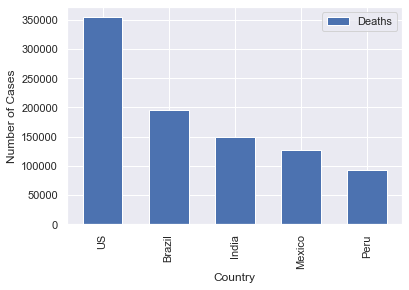

In [21]:
# Bar graph for the countries having highest death rates

plt.ylabel('Number of Cases')                                                       # label for Y-Axis

plt.xlabel('Country')                                                               # label for X-Axis

plt.bar(rankedByDeath['Country_Region'], rankedByDeath['Deaths'], width = 0.6);     # plot the bar graph with Country_Region and Deaths columns

plt.xticks(rankedByDeath['Country_Region'], rotation = 'vertical')                  # making the country names vertical

plt.legend(labels = ['Deaths']);                                                    # adding legend to the bar graph

Show the list of countries with non-zero Confirmed cases in which all the cases of Covid recovered.

In [22]:
# finding the countries with non zero confirmed cases and finding the countries having equal confirmed cases and recovered cases
# using fancy indexing

confirmed0 = top10byCC[top10byCC['Confirmed'] != 0]
confirmed0[confirmed0['Confirmed'] == confirmed0['Recovered']].reset_index(level = 0)

,index,Country_Region,Confirmed,Deaths,Recovered
0,188,Marshall Islands,4,0,4
1,189,Samoa,2,0,2
2,190,Vanuatu,1,0,1
